In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('process capability_data.csv')

In [3]:
lsl = 1
usl = 1.5

In [4]:
data_mean = data.iloc[:,1:len(data.columns)].mean(axis=1).mean()
std_overall = data.iloc[:,1:len(data.columns)].stack().std() 
std_within = (data.iloc[:,1:len(data.columns)].std(axis=1)**2).mean()**(0.5)

In [5]:
# prep normal curve 
norm_overall = np.random.normal(loc=data_mean, scale=std_overall, size=100_000)
norm_within = np.random.normal(loc=data_mean, scale=std_within, size=100_000)

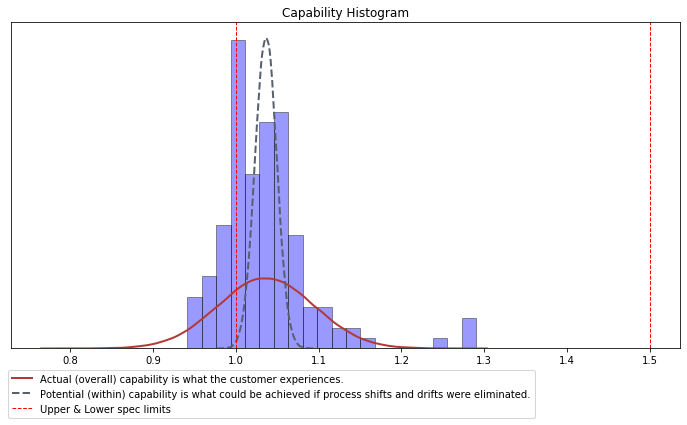

In [12]:
N = len(data.iloc[:,1:len(data.columns)].stack())
plt.figure(figsize=(12,6))

ax =sns.distplot(data.iloc[:,1:len(data.columns)], hist=True,
                 kde=False, bins=int(N/7), color = 'blue', hist_kws={'edgecolor':'black'})

# plot Actual(Overall)
ax = sns.distplot(norm_overall,
                  hist=False, kde=True,
                  kde_kws={'linewidth': 2,'color':'#b33939','alpha':1,
                           'label':'Actual (overall) capability is what the customer experiences.'})

ax = sns.distplot(norm_within,
                  hist=False, kde=True, 
                  kde_kws={'linewidth': 2,'color':'#57606f', 'alpha':1, 'ls' : '--',
                           'label':'Potential (within) capability is what could be \
achieved if process shifts and drifts were eliminated.'})


plt.title('Capability Histogram')
plt.axvline(lsl, color = 'red', ls = '--', linewidth = 1, label= 'Upper & Lower spec limits')
plt.axvline(usl, color = 'red', ls = '--', linewidth = 1, )
plt.legend(bbox_to_anchor=(0.79, -0.05))
ax.yaxis.set_visible(False)
plt.show()

